In [1]:
#for i in range(100):
 #   print(f"LA_0078 {1001 + i}f - - spoof")

In [2]:
import os
import pandas as pd
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import soundfile as sf
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#directory_path = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_train\flac"
directory_path = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_eval\flac"

file_list = [f for f in os.listdir(directory_path) if f.endswith('.flac')]

for file_name in file_list:
    file_path = os.path.join(directory_path, file_name)
    with sf.SoundFile(file_path, 'r') as mywav:
        duration_seconds = len(mywav) / mywav.samplerate
        print(f"Length of {file_name}: {duration_seconds:.1f} s")

Length of LA_E_1000147.flac: 3.2 s
Length of LA_E_1000273.flac: 2.1 s
Length of LA_E_1000791.flac: 1.5 s
Length of LA_E_1000841.flac: 4.1 s
Length of LA_E_1000989.flac: 2.2 s
Length of LA_E_1001227.flac: 3.8 s
Length of LA_E_1001232.flac: 2.6 s
Length of LA_E_1001320.flac: 3.9 s
Length of LA_E_1001476.flac: 3.5 s
Length of LA_E_1001893.flac: 2.5 s
Length of LA_E_1001964.flac: 6.6 s
Length of LA_E_1001976.flac: 4.2 s
Length of LA_E_1002073.flac: 1.3 s
Length of LA_E_1002282.flac: 2.3 s
Length of LA_E_1002394.flac: 0.9 s
Length of LA_E_1002474.flac: 7.1 s
Length of LA_E_1002658.flac: 2.5 s
Length of LA_E_1002683.flac: 5.1 s
Length of LA_E_1002769.flac: 4.2 s
Length of LA_E_1002802.flac: 4.1 s
Length of LA_E_1002903.flac: 3.2 s
Length of LA_E_1002947.flac: 4.8 s
Length of LA_E_1002990.flac: 1.7 s
Length of LA_E_1003128.flac: 2.5 s
Length of LA_E_1003228.flac: 1.4 s
Length of LA_E_1003257.flac: 3.0 s
Length of LA_E_1003530.flac: 3.1 s
Length of LA_E_1003768.flac: 0.9 s
Length of LA_E_10038

In [4]:
# Define paths and parameters
DATASET_PATH = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_eval\flac"
LABEL_FILE_PATH = "C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_cm_protocols\ASVspoof2019.LA.cm.eval.trl.txt"
NUM_CLASSES = 2  # Number of classes (bonafide and spoof)
SAMPLE_RATE = 16000  # Sample rate of your audio files
DURATION = 5  # Duration of audio clips in seconds
N_MELS = 128  # Number of Mel frequency bins
n_fft = 1024  # or some other larger value
hop_length = 512  # Adjust as needed
window = 'hann'  # or other window functions
#spectrogram = librosa.feature.melspectrogram(y=DATASET_PATH, sr=SAMPLE_RATE, n_fft=4096)


In [5]:
with open(LABEL_FILE_PATH, 'r') as label_file:
    lines = label_file.readlines()

In [6]:
df = pd.read_csv(r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_cm_protocols\ASVspoof2019.LA.cm.eval.trl.txt", sep=" ", header=None)

In [7]:
df

0             1  2    3         4
0      LA_0039  LA_E_2834763  -  A11     spoof
1      LA_0014  LA_E_8877452  -  A14     spoof
2      LA_0040  LA_E_6828287  -  A16     spoof
3      LA_0022  LA_E_6977360  -  A09     spoof
4      LA_0031  LA_E_5932896  -  A13     spoof
...        ...           ... ..  ...       ...
71232  LA_0004  LA_E_1665632  -    -  bonafide
71233  LA_0038  LA_E_5085671  -  A09     spoof
71234  LA_0012  LA_E_4926022  -  A16     spoof
71235  LA_0052  LA_E_2894498  -    -  bonafide
71236  LA_0009  LA_E_4689563  -  A19     spoof

[71237 rows x 5 columns]

In [8]:
#df.shape
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [9]:
df.columns =['speaker_id','filename','system_id','null','class_name']
df

speaker_id      filename system_id null class_name
0        LA_0039  LA_E_2834763         -  A11      spoof
1        LA_0014  LA_E_8877452         -  A14      spoof
2        LA_0040  LA_E_6828287         -  A16      spoof
3        LA_0022  LA_E_6977360         -  A09      spoof
4        LA_0031  LA_E_5932896         -  A13      spoof
...          ...           ...       ...  ...        ...
71232    LA_0004  LA_E_1665632         -    -   bonafide
71233    LA_0038  LA_E_5085671         -  A09      spoof
71234    LA_0012  LA_E_4926022         -  A16      spoof
71235    LA_0052  LA_E_2894498         -    -   bonafide
71236    LA_0009  LA_E_4689563         -  A19      spoof

[71237 rows x 5 columns]

In [10]:
df.drop(columns=['null'],inplace=True)
df

speaker_id      filename system_id class_name
0        LA_0039  LA_E_2834763         -      spoof
1        LA_0014  LA_E_8877452         -      spoof
2        LA_0040  LA_E_6828287         -      spoof
3        LA_0022  LA_E_6977360         -      spoof
4        LA_0031  LA_E_5932896         -      spoof
...          ...           ...       ...        ...
71232    LA_0004  LA_E_1665632         -   bonafide
71233    LA_0038  LA_E_5085671         -      spoof
71234    LA_0012  LA_E_4926022         -      spoof
71235    LA_0052  LA_E_2894498         -   bonafide
71236    LA_0009  LA_E_4689563         -      spoof

[71237 rows x 4 columns]

In [11]:
df['filepath'] = f'{LABEL_FILE_PATH}/ASVspoof2019_LA_eval/flac/'+df.filename+'.flac'
df['target'] = (df.class_name=='spoof').astype('int32')
df

speaker_id      filename system_id class_name  \
0        LA_0039  LA_E_2834763         -      spoof   
1        LA_0014  LA_E_8877452         -      spoof   
2        LA_0040  LA_E_6828287         -      spoof   
3        LA_0022  LA_E_6977360         -      spoof   
4        LA_0031  LA_E_5932896         -      spoof   
...          ...           ...       ...        ...   
71232    LA_0004  LA_E_1665632         -   bonafide   
71233    LA_0038  LA_E_5085671         -      spoof   
71234    LA_0012  LA_E_4926022         -      spoof   
71235    LA_0052  LA_E_2894498         -   bonafide   
71236    LA_0009  LA_E_4689563         -      spoof   

                                                filepath  target  
0      C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
1      C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
2      C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
3      C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
4      C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
...                                                  ...     ...  
71232  C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       0  
71233  C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
71234  C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  
71235  C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       0  
71236  C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_L...       1  

[71237 rows x 6 columns]

In [12]:
df['class_name'].value_counts()

class_name
spoof       63882
bonafide     7355
Name: count, dtype: int64

In [13]:
len(df)

71237

In [14]:
#pd.Series(y).value_counts()

In [15]:

import random

# Set the desired sample size
sample_size = len(df)  # Adjust this to your desired size

labels = {}

for line in lines:
    parts = line.strip().split()
    file_name = parts[1]
    label = 1 if parts[-1] == "bonafide" else 0
    labels[file_name] = label

# Extract a random sample of file names
sample_file_names = random.sample(list(labels.keys()), sample_size)

X = []
y = []

max_time_steps = 109  # Define the maximum time steps for your model

for file_name in sample_file_names:
    label = labels[file_name]
    file_path = os.path.join(DATASET_PATH, file_name + ".flac")

    # Load audio file using librosa
    audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)

    # Extract Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Ensure all spectrograms have the same width (time steps)
    if mel_spectrogram.shape[1] < max_time_steps:
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, max_time_steps - mel_spectrogram.shape[1])), mode='constant')
    else:
        mel_spectrogram = mel_spectrogram[:, :max_time_steps]

    X.append(mel_spectrogram)
    y.append(label)


In [16]:
y_encoded = to_categorical(y, NUM_CLASSES)

In [17]:
y_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X, y are lists
X = np.array(X)
y = np.array(y)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you can print the shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(45591, 128, 109) (45591,) (14248, 128, 109) (14248,)


In [20]:
# Define CNN model architecture
input_shape = (N_MELS, X_train.shape[2], 1)  # Input shape for CNN (height, width, channels)
model_input = Input(shape=input_shape)

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Assuming model_input is defined somewhere before this code
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(input_shape)))  # Adjust input_shape accordingly
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
#model_output = Dense(1, activation='sigmoid')

In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy',loss_weights=[1,2], metrics=['accuracy'])

In [83]:
#model.evaluate(X_train, y_train)

In [84]:
# Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val))

Epoch 1/3
1425/1425 [==============================] - 82s 56ms/step - loss: 0.2014 - accuracy: 0.9158 - val_loss: 0.0874 - val_accuracy: 0.9643
Epoch 2/3
1425/1425 [==============================] - 70s 49ms/step - loss: 0.0608 - accuracy: 0.9775 - val_loss: 0.0450 - val_accuracy: 0.9829
Epoch 3/3
1425/1425 [==============================] - 68s 48ms/step - loss: 0.0377 - accuracy: 0.9868 - val_loss: 0.0257 - val_accuracy: 0.9925


In [85]:
model.evaluate(X_train, y_train)

1425/1425 [==============================] - 18s 13ms/step - loss: 0.0266 - accuracy: 0.9954


[0.026553651317954063, 0.9953938126564026]

In [86]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(45591, 128, 109) (45591,)
(14248, 128, 109) (14248,)


In [87]:
# saving the model
model.save("audio_classifier20.h5")

C:\Users\3bdal\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


--------
## Visualisation

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
# Load the model and preprocess test data (similar to training data preprocessing)
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model

In [30]:
df_eval= pd.read_csv("ASVspoof2019.LA.cm.train1.trn.txt")

In [31]:
df_eval

LA_0079 LA_T_1138215 - - bonafide
0      LA_0079 LA_T_1271820 - - bonafide
1      LA_0079 LA_T_1272637 - - bonafide
2      LA_0079 LA_T_1276960 - - bonafide
3      LA_0079 LA_T_1341447 - - bonafide
4      LA_0079 LA_T_1363611 - - bonafide
...                                  ...
25571            LA_0078 1095f - - spoof
25572            LA_0078 1096f - - spoof
25573            LA_0078 1097f - - spoof
25574            LA_0078 1098f - - spoof
25575            LA_0078 1099f - - spoof

[25576 rows x 1 columns]

In [88]:
# Define paths and parameters
#r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_train\flac"
TEST_DATASET_PATH = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_train\flac"
MODEL_PATH = "audio_classifier20.h5"  # Replace with the actual path to your saved model
SAMPLE_RATE = 16000
DURATION = 5
N_MELS = 128
MAX_TIME_STEPS = 109

In [89]:
# Load the saved model
model = load_model(MODEL_PATH)

In [34]:
len(df_eval)

25576

In [35]:
import random

# Set the desired sample size
#sample_size = 16369  # Adjust this to your desired size
sample_size = len(df_eval)

# Extract a random sample of file names from the test data
sample_test_files = random.sample(os.listdir(TEST_DATASET_PATH), sample_size)

X_teste = []

for file_name in sample_test_files:
    file_path = os.path.join(TEST_DATASET_PATH, file_name)

    # Load audio file using librosa
    audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)

    # Extract Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Ensure all spectrograms have the same width (time steps)
    if mel_spectrogram.shape[1] < MAX_TIME_STEPS:
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, MAX_TIME_STEPS - mel_spectrogram.shape[1])), mode='constant')
    else:
        mel_spectrogram = mel_spectrogram[:, :MAX_TIME_STEPS]

    X_teste.append(mel_spectrogram)

# Convert list to numpy array
X_teste = np.array(X_teste)

# Predict using the loaded model
y_pred = model.predict(X_teste>0.5)

# Convert probabilities to predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred


800/800 [==============================] - 10s 12ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [36]:
y_pred.shape

(25576, 1)

In [37]:
# Get True Labels

# Path to the ASVspoof 2019 protocol file
PROTOCOL_FILE_PATH = "C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_cm_protocols\ASVspoof2019.LA.cm.train1.trn.txt"


# Dictionary to store true labels for each file
true_labels = {}

# Read the protocol file
with open(PROTOCOL_FILE_PATH, 'rb') as protocol_file:
    lines = protocol_file.read().decode('utf-8').splitlines()
    print(lines)

for line in lines:
    line = line.strip()  # Strip leading/trailing whitespace
    parts = line.split()
    if len(parts) > 1:  # Check if line has enough parts to extract label
        file_name = parts[1]
        label = parts[-1]  # Last part contains the label
        true_labels[file_name] = label

# Now 'true_labels' contains the true labels for each file
true_labels

['LA_0079 LA_T_1138215 - - bonafide', 'LA_0079 LA_T_1271820 - - bonafide', 'LA_0079 LA_T_1272637 - - bonafide', 'LA_0079 LA_T_1276960 - - bonafide', 'LA_0079 LA_T_1341447 - - bonafide', 'LA_0079 LA_T_1363611 - - bonafide', 'LA_0079 LA_T_1596451 - - bonafide', 'LA_0079 LA_T_1608170 - - bonafide', 'LA_0079 LA_T_1684951 - - bonafide', 'LA_0079 LA_T_1699801 - - bonafide', 'LA_0079 LA_T_1703395 - - bonafide', 'LA_0079 LA_T_1736342 - - bonafide', 'LA_0079 LA_T_1779188 - - bonafide', 'LA_0079 LA_T_1786825 - - bonafide', 'LA_0079 LA_T_1787246 - - bonafide', 'LA_0079 LA_T_1905558 - - bonafide', 'LA_0079 LA_T_2205687 - - bonafide', 'LA_0079 LA_T_2220901 - - bonafide', 'LA_0079 LA_T_2361751 - - bonafide', 'LA_0079 LA_T_2373806 - - bonafide', 'LA_0079 LA_T_2417641 - - bonafide', 'LA_0079 LA_T_2520083 - - bonafide', 'LA_0079 LA_T_2562689 - - bonafide', 'LA_0079 LA_T_2564579 - - bonafide', 'LA_0079 LA_T_2732709 - - bonafide', 'LA_0079 LA_T_2759900 - - bonafide', 'LA_0079 LA_T_2838981 - - bonafide', 

{'LA_T_1138215': 'bonafide',
 'LA_T_1271820': 'bonafide',
 'LA_T_1272637': 'bonafide',
 'LA_T_1276960': 'bonafide',
 'LA_T_1341447': 'bonafide',
 'LA_T_1363611': 'bonafide',
 'LA_T_1596451': 'bonafide',
 'LA_T_1608170': 'bonafide',
 'LA_T_1684951': 'bonafide',
 'LA_T_1699801': 'bonafide',
 'LA_T_1703395': 'bonafide',
 'LA_T_1736342': 'bonafide',
 'LA_T_1779188': 'bonafide',
 'LA_T_1786825': 'bonafide',
 'LA_T_1787246': 'bonafide',
 'LA_T_1905558': 'bonafide',
 'LA_T_2205687': 'bonafide',
 'LA_T_2220901': 'bonafide',
 'LA_T_2361751': 'bonafide',
 'LA_T_2373806': 'bonafide',
 'LA_T_2417641': 'bonafide',
 'LA_T_2520083': 'bonafide',
 'LA_T_2562689': 'bonafide',
 'LA_T_2564579': 'bonafide',
 'LA_T_2732709': 'bonafide',
 'LA_T_2759900': 'bonafide',
 'LA_T_2838981': 'bonafide',
 'LA_T_2873890': 'bonafide',
 'LA_T_2938316': 'bonafide',
 'LA_T_3131990': 'bonafide',
 'LA_T_3141223': 'bonafide',
 'LA_T_3167734': 'bonafide',
 'LA_T_3187715': 'bonafide',
 'LA_T_3215578': 'bonafide',
 'LA_T_3247389

In [38]:
y_true = np.array([1 if label == "bonafide" else 0 for label in true_labels.values()]) # y_true are the true labels for each file
y_true

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
'''
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_train is one-hot encoded, and you want to compare it with predicted labels
y_true = pd.DataFrame(y_train).apply(np.argmax, axis=1)
y_pred = np.argmax(model.predict(X_train), axis=1)

# Example of using accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# Example of using classification_report
report = classification_report(y_true, y_pred)
print('Classification Report:\n', report)
'''

"\nfrom sklearn.metrics import accuracy_score, classification_report\n\n# Assuming y_train is one-hot encoded, and you want to compare it with predicted labels\ny_true = pd.DataFrame(y_train).apply(np.argmax, axis=1)\ny_pred = np.argmax(model.predict(X_train), axis=1)\n\n# Example of using accuracy_score\naccuracy = accuracy_score(y_true, y_pred)\nprint(f'Accuracy: {accuracy}')\n\n# Example of using classification_report\nreport = classification_report(y_true, y_pred)\nprint('Classification Report:\n', report)\n"

In [40]:
model.predict(X_train)>0.5#.shape

1425/1425 [==============================] - 18s 12ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

1425/1425 [==============================] - 18s 13ms/step


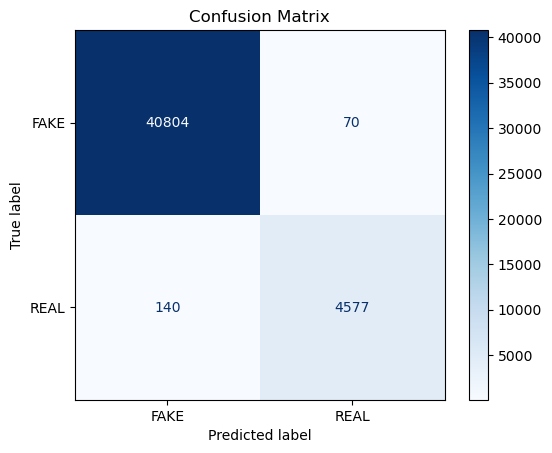

In [90]:
# CONFUSION MATRIX

#y_true = pd.DataFrame(y_train).apply(np.argmax, axis=1)
#y_pred = np.argmax(model.predict(X_train), axis=1)

cm = confusion_matrix(y_train, model.predict(X_train)>0.5)
#cm = confusion_matrix(pd.DataFrame(y_train).apply(np.argmax, axis = 1), model.predict(X_train))

# Display the confusion matrix
classes = ["FAKE", "REAL"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [91]:
model.predict(X_val)

357/357 [==============================] - 4s 12ms/step


array([[8.6504161e-07],
       [4.9649108e-05],
       [9.9999887e-01],
       ...,
       [4.4167382e-01],
       [4.8298596e-05],
       [5.9315566e-02]], dtype=float32)

357/357 [==============================] - 5s 13ms/step


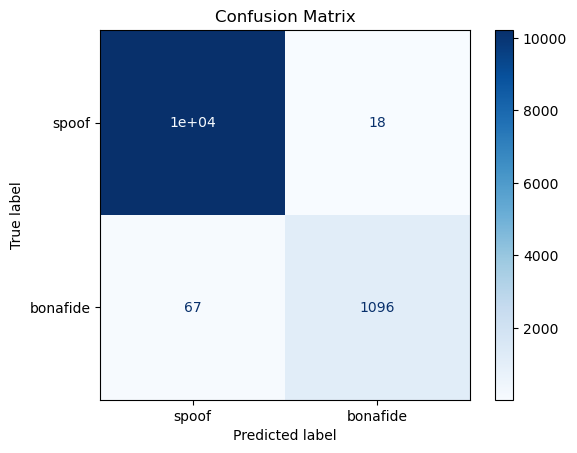

In [92]:
#Display the confusion matrix
cm = confusion_matrix(y_val, model.predict(X_val)>0.5)
classes = ["spoof", "bonafide"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

446/446 [==============================] - 6s 12ms/step


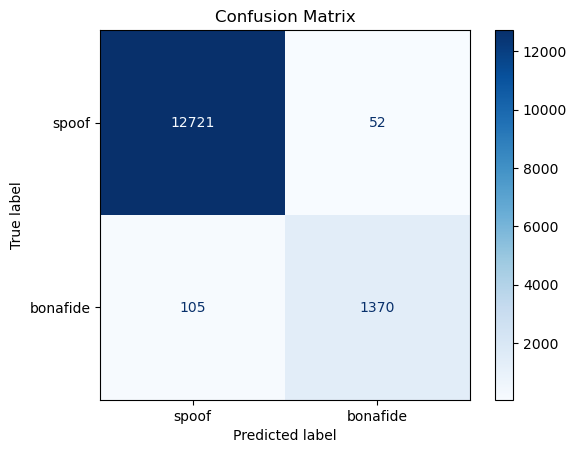

In [93]:
#Display the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test)>0.5)
classes = ["spoof", "bonafide"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [94]:
model.evaluate(X_test, y_test)

446/446 [==============================] - 6s 13ms/step - loss: 0.0371 - accuracy: 0.9890


[0.03706628084182739, 0.9889808893203735]

In [63]:
print(len(y_pred_classes))

25576


In [64]:
print(len(y_true))

25577


In [65]:
#Display the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
classes = ["spoof", "bonafide"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [25577, 25576]

In [ ]:
'''
#احس ماله لزمه

# ROC Curve

from sklearn.metrics import roc_curve, auc

# Predict using the loaded model
y_pred = model.predict(X_test)
print(y_pred)
# Get the predicted probabilities for the positive class
y_pred_prob = y_pred[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
'''

In [ ]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
'''
#احس ماله لزمه

# Compute precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
avg_precision = average_precision_score(y_true, y_pred_prob)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Avg. Precision = %0.2f' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
'''

In [ ]:
# Calibration Curve
from sklearn.calibration import calibration_curve

In [ ]:
'''
#احس ماله لزمه
# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_true, y_pred_prob, n_bins=10)

# Plot calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc="lower right")
plt.show()
'''

In [ ]:
# Plot bar chart of class distribution

import seaborn as sns
import matplotlib.pyplot as plt


LABELS = ['spoof', 'bonafide']

plt.figure(figsize=(6, 4))
sns.countplot(x=y_true, palette="Set2")
plt.xticks(ticks=[0, 1], labels=LABELS)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
'''
# Visualising Mel Spectrogram

import os
import librosa.display

# Folder containing .flac audio files
folder_path = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_eval\flac"
#folder_path = "TestEvaluation"

# Get a list of all .flac files in the folder
flac_files = [file for file in os.listdir(folder_path) if file.endswith(".flac")]

# Define the hop length
HOP_LENGTH = 512  # Adjust this value based on your needs

# Loop through each .flac file and visualize its Mel spectrogram
for flac_file in flac_files:
    audio_file_path = os.path.join(folder_path, flac_file)

    # Load the audio file using librosa
    audio, _ = librosa.load(audio_file_path, sr=SAMPLE_RATE, duration=DURATION)

    # Calculate the Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Plot the Mel spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spectrogram, x_axis='time', y_axis='mel', sr=SAMPLE_RATE, hop_length=HOP_LENGTH)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - {flac_file}')
    plt.show()
'''

In [ ]:
import os
import librosa.display
import matplotlib.pyplot as plt

# Folder containing .flac audio files
folder_path = r"C:\mine\SDAIA T5\CAPSTONE\LA\LA\ASVspoof2019_LA_eval\flac"

# Get a list of all .flac files in the folder
flac_files = [file for file in os.listdir(folder_path) if file.endswith(".flac")]

# Define the hop length
HOP_LENGTH = 512  # Adjust this value based on your needs

# Limit the number of samples to 20
num_samples = 20

# Loop through each .flac file and visualize its Mel spectrogram
for i, flac_file in enumerate(flac_files):
    if i >= num_samples:
        break  # Stop iterating after 20 samples

    audio_file_path = os.path.join(folder_path, flac_file)

    # Load the audio file using librosa
    audio, _ = librosa.load(audio_file_path, sr=SAMPLE_RATE, duration=DURATION)

    # Calculate the Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Plot the Mel spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spectrogram, x_axis='time', y_axis='mel', sr=SAMPLE_RATE, hop_length=HOP_LENGTH)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram - {flac_file}')
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

mod = load_model("audio_classifier.h5")
plot_model(mod, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
